In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.neighbors import NearestNeighbors

pd.set_option('display.max_columns', None)

In [ ]:
flight_data_train = pd.read_csv('./flight_data_train.csv')
flight_data_test = pd.read_csv('./flight_data_test.csv')

In [ ]:
flight_data_train['scheduledoffblocktime'] = pd.to_datetime(flight_data_train['scheduledoffblocktime'])
flight_data_test['scheduledoffblocktime'] = pd.to_datetime(flight_data_test['scheduledoffblocktime'])

In [ ]:
departdatetime = flight_data_train['scheduledoffblocktime'].dt

flight_data_train['depart_day'] = departdatetime.day
flight_data_train['depart_month'] = departdatetime.month
# flight_data_train['depart_year'] = departdatetime.year

flight_data_train['depart_minute'] = departdatetime.hour * 60 + departdatetime.minute
# Test
departdatetime = flight_data_test['scheduledoffblocktime'].dt

flight_data_test['depart_day'] = departdatetime.day
flight_data_test['depart_month'] = departdatetime.month
# flight_data_test['depart_year'] = departdatetime.year

flight_data_test['depart_minute'] = departdatetime.hour * 60 + departdatetime.minute

flight_data_train.drop(columns=['scheduledoffblocktime'], axis=1, inplace=True)
flight_data_test.drop(columns=['scheduledoffblocktime'], axis=1, inplace=True)

In [ ]:
X_train = flight_data_train.drop(columns=['finalflightstatus', 'delay_in_secs'], axis=1)
X_test = flight_data_test.drop(columns=['finalflightstatus', 'delay_in_secs'], axis=1)

y_train_cls = flight_data_train['finalflightstatus']
y_test_cls = flight_data_test['finalflightstatus']
y_train_reg = flight_data_train['delay_in_secs']
y_test_reg = flight_data_test['delay_in_secs']

In [ ]:
string_columns = X_train.select_dtypes(include=['object', 'string']).columns
string_columns

Index(['flightnumber', 'traffictypecode', 'airlinecode_iata',
       'destination_iata', 'aircraft_iata', 'aircraftparkingposition',
       'publicgatenumber', 'skyc1', 'skyc2'],
      dtype='object')

In [ ]:
le = LabelEncoder()
for col in string_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [ ]:
y_train_cls = y_train_cls.map({'On-Time': 0, 'Delayed':1})
y_test_cls = y_test_cls.map({'On-Time': 0, 'Delayed':1})

In [ ]:
numerical_cols = [
    "tmpf",
    "dwpf",
    "relh",
    "drct",
    "sknt",
    "p01i",
    "alti",
    "vsby",
    "skyl1",
    "skyl2",
]

In [ ]:
# scaler = StandardScaler()
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [78]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.439116,1.0,0.342466,0.213816,0.836066,0.0,0.457490,0.971223,0.666667,0.515152,0.575,0.343852,0.333333,0.185185,0.0,0.536842,0.799353,0.333333,1.00,0.000000,0.0,0.933333,0.272727,0.145935
1,0.275505,1.0,0.253425,0.167763,0.721311,0.0,0.659919,0.251799,1.000000,0.727273,0.775,0.390344,0.166667,0.111111,0.0,0.252632,1.000000,1.000000,1.00,0.000000,0.0,0.333333,0.727273,0.913829
2,0.976493,1.0,0.972603,0.799342,0.147541,0.0,0.331984,0.697842,0.333333,0.757576,0.675,0.274955,0.916667,0.518519,0.0,0.284211,1.000000,1.000000,1.00,0.000000,0.0,0.166667,0.454545,0.677554
3,0.228021,1.0,0.253425,0.246711,0.721311,0.0,0.085020,0.388489,1.000000,0.333333,0.625,0.588724,0.666667,0.111111,0.0,0.905263,0.799353,0.166667,1.00,0.642857,0.0,0.366667,1.000000,0.437804
4,0.220498,1.0,0.253425,0.223684,0.721311,0.0,0.137652,0.366906,1.000000,0.303030,0.550,0.508678,1.000000,0.074074,0.0,0.810526,1.000000,1.000000,1.00,0.000000,0.0,0.966667,0.000000,0.906880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,0.834509,1.0,0.739726,0.546053,0.180328,0.0,0.421053,0.964029,0.666667,0.242424,0.650,0.767540,0.277778,0.370370,0.0,0.778947,0.799353,0.000000,0.25,0.642857,1.0,0.000000,0.000000,0.184156
152636,0.511519,1.0,0.342466,0.276316,0.803279,0.0,0.198381,0.985612,0.666667,0.515152,0.425,0.213842,0.250000,0.185185,0.0,0.810526,1.000000,1.000000,1.00,0.000000,0.0,0.700000,0.909091,0.451703
152637,0.267043,1.0,0.253425,0.559211,0.721311,0.0,0.101215,0.223022,1.000000,0.363636,0.500,0.383822,0.888889,0.148148,0.0,0.747368,1.000000,1.000000,1.00,0.000000,0.0,1.000000,0.000000,0.590688
152638,0.314057,1.0,0.342466,0.279605,0.803279,0.0,0.161943,0.985612,0.666667,0.545455,0.600,0.346797,0.916667,0.333333,0.0,0.600000,1.000000,1.000000,1.00,0.000000,0.0,0.266667,0.181818,0.656706


In [62]:
X_scaled = pd.concat([X_train, X_test], axis=0)
X_scaled

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

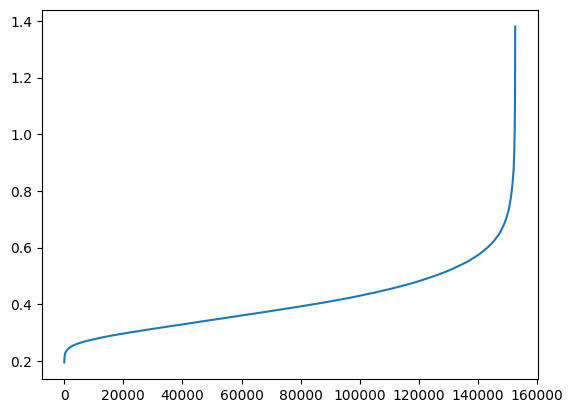

In [60]:
neighbors = NearestNeighbors(n_neighbors=23*2)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_scaled)
avg_distance = distances.mean(axis=1)
plt.plot(np.sort(avg_distance))
plt.show()

In [61]:
sc = DBSCAN(eps=0.6, min_samples=23*2)
clusters = pd.DataFrame(sc.fit_predict(X_scaled), columns=['Cluster'])
clusters['Cluster'].value_counts()

Cluster
 0     138008
-1       7684
 2       2781
 1       1601
 3        969
 4        525
 9        228
 6        193
 5        159
 7        141
 10        89
 8         81
 11        60
 14        51
 12        49
 13        21
Name: count, dtype: int64